In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
import re #RegEX
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:

#  Data Loading and Inspection
data_file = '/content/DataNeuron_Text_Similarity.csv'

originaldata=pd.read_csv(data_file)



df = pd.read_csv(data_file)
print(f"Dataset '{data_file}' loaded successfully!")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())

print("\n--- Initial Data Inspection Complete ---")


print("*"*100)


Dataset '/content/DataNeuron_Text_Similarity.csv' loaded successfully!

First 5 rows of the dataset:
                                               text1  \
0  broadband challenges tv viewing the number of ...   
1  rap boss arrested over drug find rap mogul mar...   
2  player burn-out worries robinson england coach...   
3  hearts of oak 3-2 cotonsport hearts of oak set...   
4  sir paul rocks super bowl crowds sir paul mcca...   

                                               text2  
0  gardener wins double in glasgow britain s jaso...  
1  amnesty chief laments war failure the lack of ...  
2  hanks greeted at wintry premiere hollywood sta...  
3  redford s vision of sundance despite sporting ...  
4  mauresmo opens with victory in la amelie maure...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text1   3000 non-null   object
 1 

In [3]:

print("\n--- Text Length Analysis ---")

df['text1_char_len'] = df['text1'].apply(len)
df['text2_char_len'] = df['text2'].apply(len)

# Calculate word length for each paragraph
# Using a simple split by space; for more robust word counting, consider NLTK's word_tokenize
df['text1_word_len'] = df['text1'].apply(lambda x: len(x.split()))
df['text2_word_len'] = df['text2'].apply(lambda x: len(x.split()))

print("\nCharacter Lengths (text1):")
print(df['text1_char_len'].describe())
print("\nCharacter Lengths (text2):")
print(df['text2_char_len'].describe())

print("\nWord Lengths (text1):")
print(df['text1_word_len'].describe())
print("\nWord Lengths (text2):")
print(df['text2_word_len'].describe())

print("\nFirst 5 rows with length columns:")
print(df[['text1', 'text1_char_len', 'text1_word_len', 'text2', 'text2_char_len', 'text2_word_len']].head())



--- Text Length Analysis ---

Character Lengths (text1):
count     3000.000000
mean      2284.210667
std       1298.469216
min        719.000000
25%       1434.250000
50%       2001.000000
75%       2844.250000
max      18387.000000
Name: text1_char_len, dtype: float64

Character Lengths (text2):
count     3000.000000
mean      2310.738667
std       1527.710510
min        501.000000
25%       1454.500000
50%       2015.000000
75%       2846.250000
max      25483.000000
Name: text2_char_len, dtype: float64

Word Lengths (text1):
count    3000.000000
mean      393.782667
std       230.005472
min       125.000000
25%       247.000000
50%       347.500000
75%       486.000000
max      3345.000000
Name: text1_word_len, dtype: float64

Word Lengths (text2):
count    3000.000000
mean      398.612333
std       271.028646
min        90.000000
25%       252.000000
50%       347.000000
75%       489.000000
max      4492.000000
Name: text2_word_len, dtype: float64

First 5 rows with length column


--- Visualizing Text Length Distributions ---


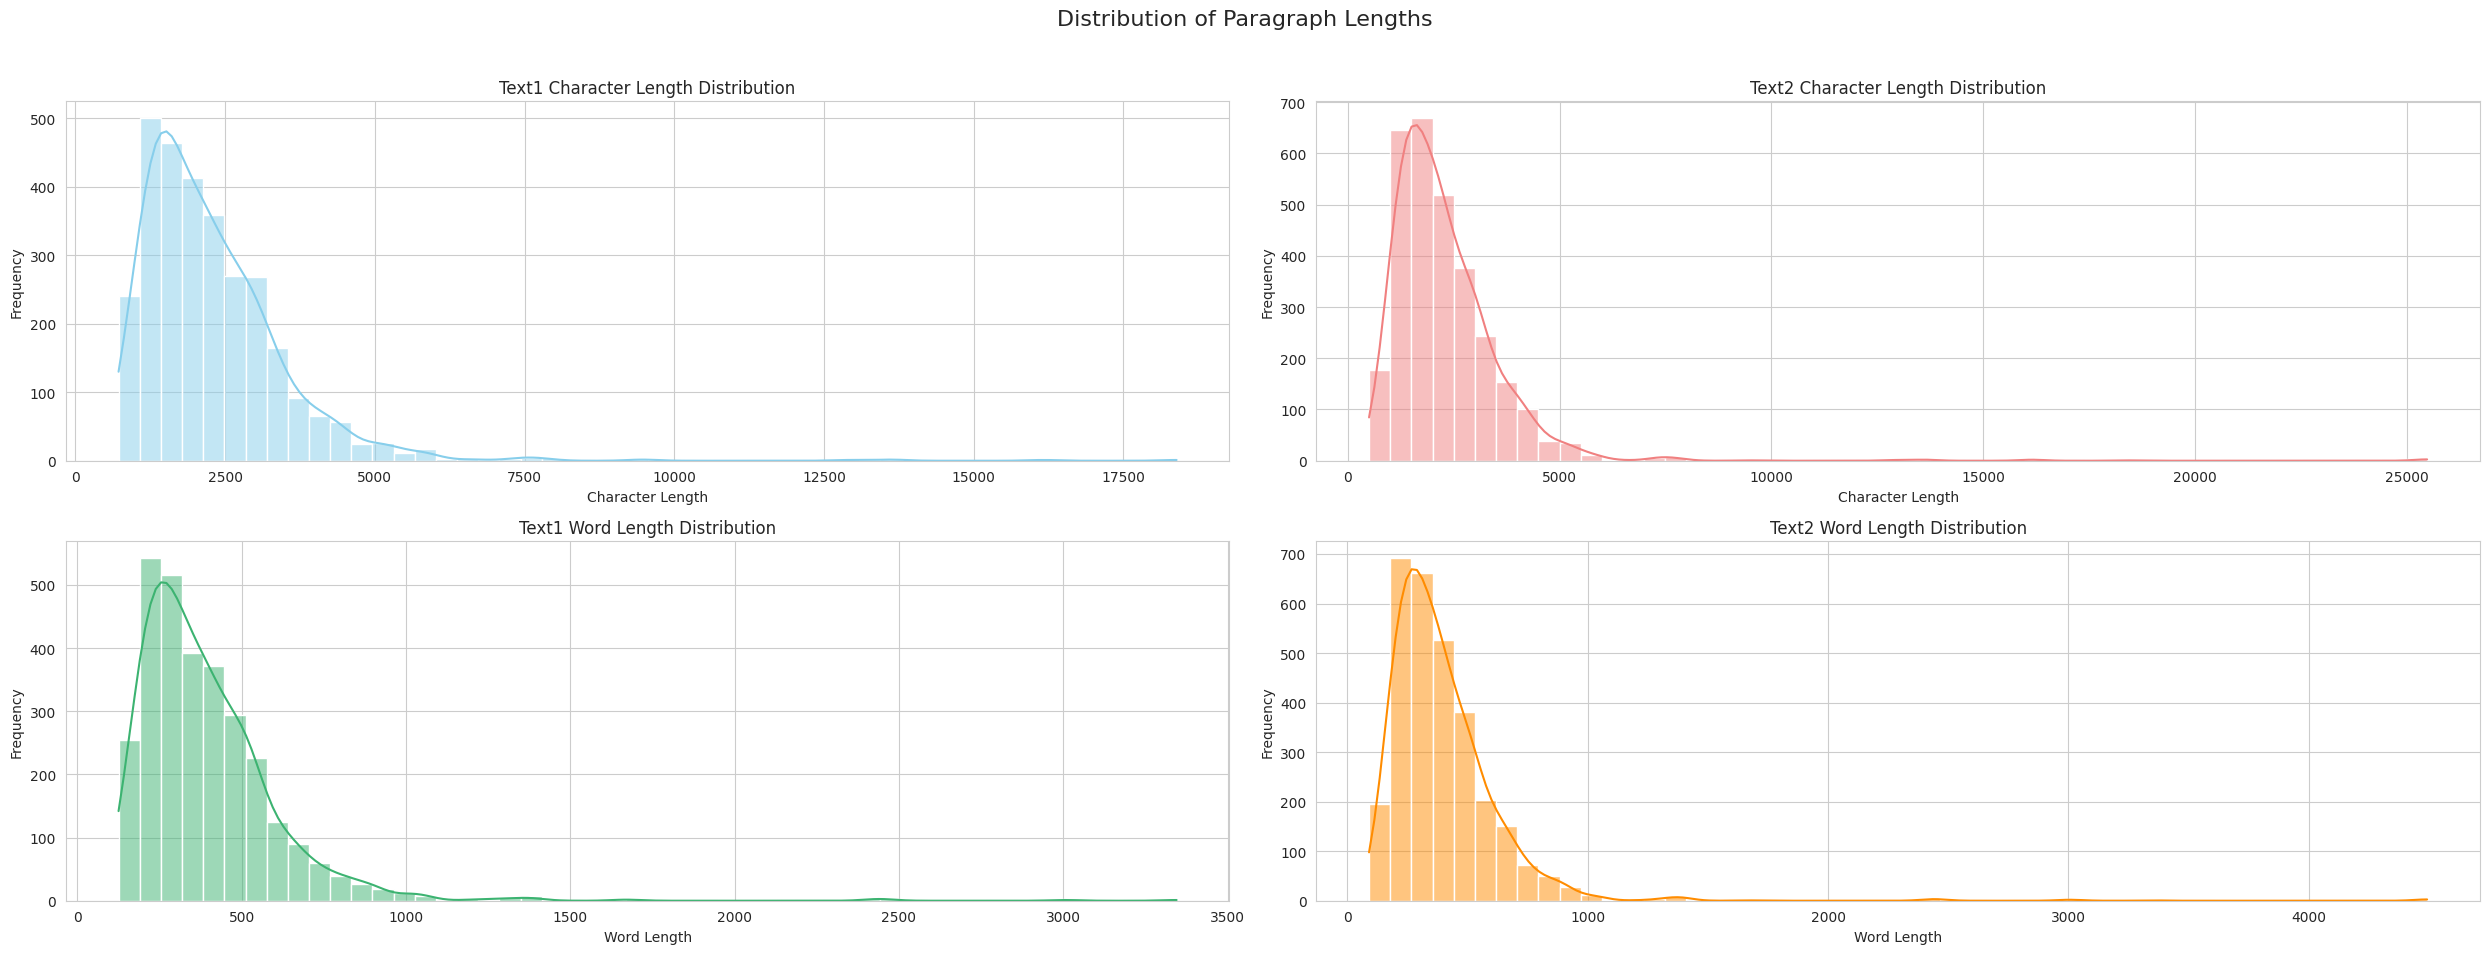


--- Text Length Visualizations Complete ---


In [6]:



print("\n--- Visualizing Text Length Distributions ---")

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(25, 10))
fig.suptitle('Distribution of Paragraph Lengths', fontsize=16)

sns.histplot(df['text1_char_len'], bins=50, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Text1 Character Length Distribution')
axes[0, 0].set_xlabel('Character Length')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['text2_char_len'], bins=50, kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Text2 Character Length Distribution')
axes[0, 1].set_xlabel('Character Length')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['text1_word_len'], bins=50, kde=True, ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('Text1 Word Length Distribution')
axes[1, 0].set_xlabel('Word Length')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df['text2_word_len'], bins=50, kde=True, ax=axes[1, 1], color='darkorange')
axes[1, 1].set_title('Text2 Word Length Distribution')
axes[1, 1].set_xlabel('Word Length')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()

print("\n--- Text Length Visualizations Complete ---")

- Seems to follow a right skewed normal distribution.

- slight problem as sentence-transformers library (and the underlying Transformer models like BERT) typically have a maximum input sequence length (e.g., 512 tokens).

- The avg word cnt here is around 400 ish words. Thats okay, but.
- The max word counts (3345 for text1, 4492 for text2) are very high.
-The mean, median, and quartiles are very similar between text1 and text2 columns which says taht the data sampling process for both columns was consistent, and we don't have a bias where one side of the pair is systematically shorter or longer.
----

- Based on these, Better to use SBERT.


--- Text Content Analysis ---

Total unique words (vocabulary size): 25737

Top 20 Most Common Words (Overall):
- the: 143145
- to: 68871
- of: 54632
- and: 50940
- a: 49780
- in: 48139
- s: 25766
- is: 24304
- for: 24242
- that: 22364
- it: 21787
- on: 20558
- said: 19638
- was: 16774
- he: 16452
- be: 16277
- with: 14578
- as: 13700
- has: 13420
- have: 12802


<ipython-input-18-c189063e3da4>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')


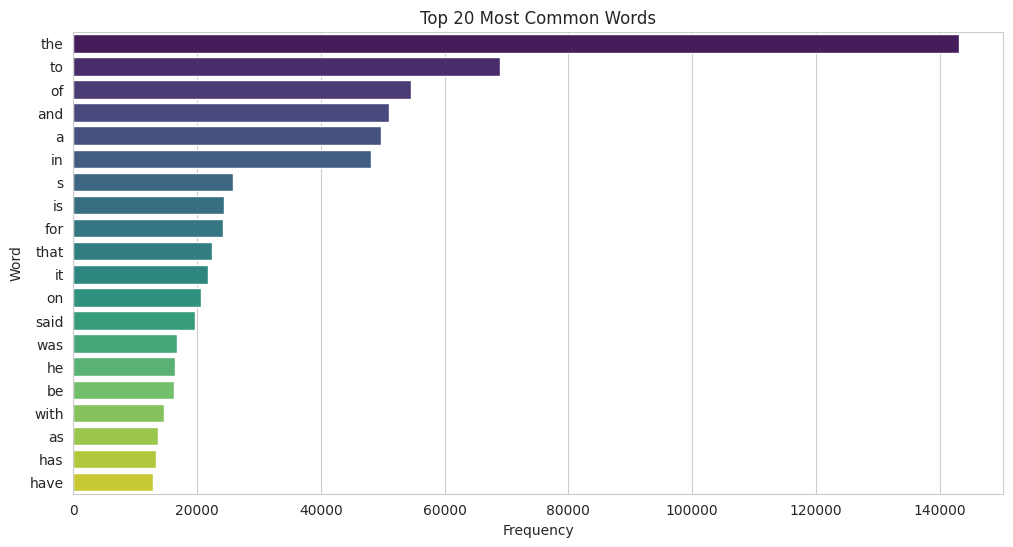


Top 20 Most Common Bigrams (excluding stopwords):
- last year: 1257
- told bbc: 1015
- said mr: 887
- mr blair: 851
- prime minister: 793
- mr brown: 689
- said would: 550
- chief executive: 543
- tony blair: 520
- general election: 496
- bbc news: 483
- six nations: 461
- last week: 448
- mr howard: 442
- new york: 425
- human rights: 422
- bn bn: 403
- years ago: 390
- number one: 380
- michael howard: 374

Top 20 Most Common Trigrams (excluding stopwords):
- told bbc news: 390
- bbc news website: 259
- told bbc radio: 245
- radio today programme: 179
- leader michael howard: 171
- bbc radio today: 165
- million dollar baby: 136
- tory leader michael: 126
- told bbc sport: 124
- next general election: 122
- mr blair said: 113
- mr howard said: 104
- leader charles kennedy: 99
- actor jamie foxx: 95
- chancellor gordon brown: 93
- two years ago: 93
- world number one: 88
- jamie foxx actress: 84
- mr clarke said: 82
- digital music players: 80

--- Text Content Analysis Complete ---


In [18]:


print("\n--- Text Content Analysis ---")

# --- 1. Basic Preprocessing for Tokenization (simple) ---
def simple_tokenize(text):
    text = text.lower() #LowCAse CONVERSION
    text = re.sub(r'[^a-z\s]', '', text) # Only alphabetic characters
    words = text.split() # Split by space
    return words

# Apply simple tokenization to both columns
all_words_text1 = []
df['text1'].apply(lambda x: all_words_text1.extend(simple_tokenize(x)))

all_words_text2 = []
df['text2'].apply(lambda x: all_words_text2.extend(simple_tokenize(x)))

all_words = all_words_text1 + all_words_text2 # Combine all words for overall vocabulary

# --- 2. Vocabulary Size ---
vocabulary = set(all_words)
print(f"\nTotal unique words (vocabulary size): {len(vocabulary)}")

# --- 3. Most Common Words (Overall) ---
print("\nTop 20 Most Common Words (Overall):")
word_counts = Counter(all_words)
for word, count in word_counts.most_common(20):
    print(f"- {word}: {count}")

# Visualize common words (optional but good for intuition)
# Exclude obvious stop words if you want to see more meaningful terms
common_words_df = pd.DataFrame(word_counts.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


# --- 4. N-grams (Bigrams and Trigrams) ---
# N-grams give us common phrases, not just individual words
from nltk.util import ngrams
from nltk.corpus import stopwords
# You might need to download stopwords if you haven't already
# import nltk
# nltk.download('stopwords')

# Define English stop words
stop_words = set(stopwords.words('english'))

def generate_ngrams(text_list, n, num_top_ngrams=20):
    tokens = [word for word in text_list if word.isalpha() and word not in stop_words]
    n_grams = ngrams(tokens, n)
    counts = Counter(n_grams)
    return counts.most_common(num_top_ngrams)

print("\nTop 20 Most Common Bigrams (excluding stopwords):")
top_bigrams = generate_ngrams(all_words, 2)
for bigram, count in top_bigrams:
    print(f"- {' '.join(bigram)}: {count}")

print("\nTop 20 Most Common Trigrams (excluding stopwords):")
top_trigrams = generate_ngrams(all_words, 3)
for trigram, count in top_trigrams:
    print(f"- {' '.join(trigram)}: {count}")

print("\n--- Text Content Analysis Complete ---")

- Vocab size is 25737.
- Generic stop words are the,to,of,and,in,s.


---

### Insights of Dataset

- This is a news corpus, mainly from the BBC, focusing on British politics, sports (especially rugby), and general current affairs/finance
- This detailed understanding further makes  my  decision to use Sentence-BERT  even stronger.
-

text1             broadband challenges tv viewing the number of ...
text2             gardener wins double in glasgow britain s jaso...
text1_char_len                                                 2377
text2_char_len                                                 2897
text1_word_len                                                  403
text2_word_len                                                  539
Name: 0, dtype: object


TypeError: 'NoneType' object is not subscriptable